## _Шипилова Полина, 303_
## _Задача №7_
# _Двумерное уравнение теплопроводности_

###  _Постановка задачи:_
Используя метод переменных направлений, решить краевую задачу:

$$\begin{equation}
 \left\{
\begin{aligned}
& \frac{\partial u}{\partial t} = \Delta u, 0<x<\pi/2, 0<y<\pi/2, t>0\\
& \frac{\partial u}{\partial x}\big|_{x=0}=\frac{\partial u}{\partial x}\big|_{x=\pi}=0\\
& \frac{\partial u}{\partial y}\big|_{y=0}=\frac{\partial u}{\partial y}\big|_{y=\pi/2}=0\\
& u\big|_{t=0}=cos4x\ cos2y
\end{aligned} \right. \label{eq1}
\end{equation} $$

###  _Аналитическое решение задачи_
Будем искать решение задачи в виде:
$$u(x,y,t)=T(t)V(x,y)$$
Тогда, решая исходную задачу методом разделения переменных, получаем:

$$\frac{T'(t)}{T(t)}=\frac{V''(x,y)}{V(x,y)}=-\lambda$$

Имеем задачу Штурма-Лиувилля для $V$:

$$
\left\{
\begin{aligned}
& V'' +\lambda V = 0\\
& \frac{\partial V}{\partial x}\big|_{x=0}=\frac{\partial V}{\partial x}\big|_{x=\pi/2}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=\pi/2}=0
\end{aligned} \right. \label{eq3} 
$$

Теперь, представляя функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и применяя метод разделения переменных, получим две задачи Штурма-Лиувилля на отрезке:

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X' \big|_{x=0}= X' \big|_{x=\pi/2}=0\\
\end{aligned} \right.   \Rightarrow X=cos(\sqrt{\nu} x)
$$

$$
\left\{
\begin{aligned}
& Y''+\mu Y = 0\\
&  \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=\pi/2}=0
\end{aligned} \right. \Rightarrow Y=cos(\sqrt{\mu} y) $$

где  $\nu = 4n^{2}$, $\mu = 4m^{2}$, $\lambda=\mu+\nu$

Тогда для функции $V$ получаем: $V_{nm}=cos(2nx)cos(2my)$

Из начальных условий получаем, что $ n=2, m=1 \Rightarrow \lambda =20 $.

Для $T(t)$ нужно решить следующую задачу:
$$
\begin{equation}\label{eq19} 
     \begin{cases}
     T'_{n,m}+ \lambda_{n,m}T_{n,m} = 0,\ t>0,\\
     T_{n,m}|_{t=0} = \varphi_{n,m},
     \end{cases}
\end{equation}
$$

где $\varphi(x,y) = \cos(4x)\cos(2y)$, а $\varphi_{n,m}$ - коэффициенты разложения функции $\varphi_(x,y)$ в ряд Фурье по системе функций ${V_{n,m}(x,y)}$.

Тогда, с учетом, что решение представляется в виде: 

$$V= \sum\limits_{n=0}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$
 
Получаем решение: $$u(x,y,t)=cos(4x)cos(2y)e^{-20t}$$

###  _График аналитического решения_
Построим график аналитического решения:

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import clear_output

import time
from tqdm import tqdm



In [83]:
N, M, J = 10, 10, 10
x_start, x_end = 0, pi/2
y_start, y_end = 0, pi/2
t_start, t_end = 0, 1

tau= t_end / J
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,M) 
t = np.linspace(t_start,t_end,J)

In [84]:
u_a = np.zeros((N,M,J))
for i in tqdm(range(N)):
    time.sleep(1)
    for n in range(0,N): 
        for m in range(0,M):
            for j in range(0,J):
                u_a[m,n,j]=cos(4*x[n])*cos(2*y[m])*exp(-20*j*tau)
print('Done!')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.02s/it]

Done!


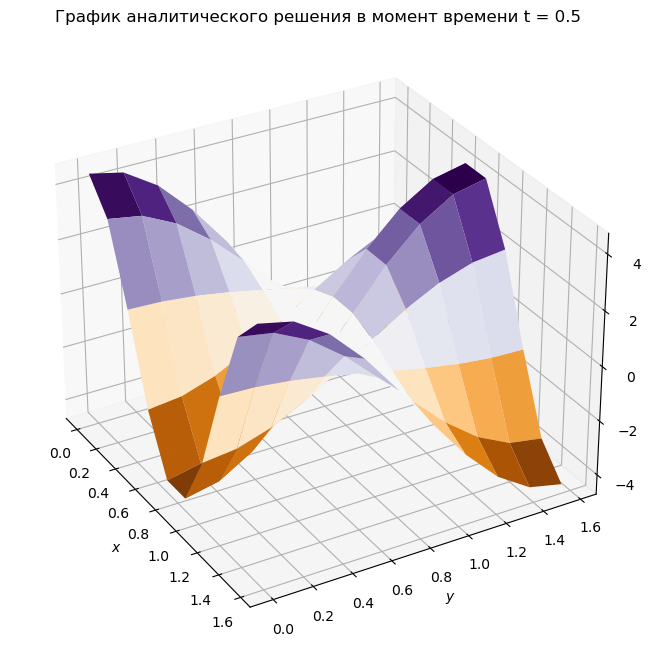

In [85]:
x1,y1 = np.meshgrid(x,y)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(x1, y1, u_a[:,:,int(J/2)], rstride = 1, cstride = 1, cmap = cm.PuOr)
# o1.view_init(30, 90)
ax.set_title('График аналитического решения в момент времени t = ' + str(round(tau*J/2,2)))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
ax.view_init(30, -30)
plt.show()

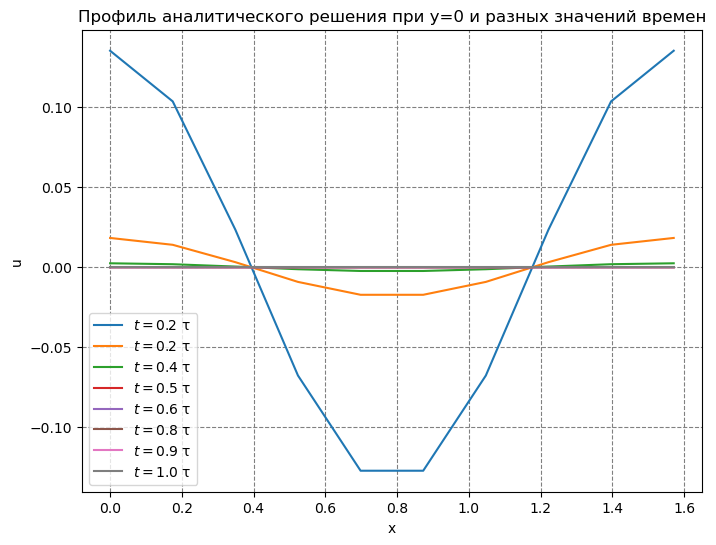

In [86]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(x_start,x_end,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического решения при y=0 и разных значений времен')

# plt.plot(x, u_a[:,0,int(0)],label='$t=$' + str(round(0,1)) + ' τ')
plt.plot(x, u_a[0,:,int(J/8)],label='$t=$' + str(round(tau*J/6,1)) + ' τ')
plt.plot(x, u_a[0,:,int(2*J/8)],label='$t= $' +str(round(tau*2*J/8,1)) + ' τ')
plt.plot(x, u_a[0,:,int(3*J/8)],label='$t= $' +str(round(tau*3*J/8,1)) + ' τ')
plt.plot(x, u_a[0,:,int(4*J/8)],label='$t= $' +str(round(tau*4*J/8,1)) + ' τ')
plt.plot(x, u_a[0,:,int(5*J/8)],label='$t= $' +str(round(tau*5*J/8,1)) + ' τ')
plt.plot(x, u_a[0,:,int(6*J/8)],label='$t= $' +str(round(tau*6*J/8,1)) + ' τ')
plt.plot(x, u_a[0,:,int(7*J/8)],label='$t= $' +str(round(tau*7*J/8,1)) + ' τ')
plt.plot(x, u_a[0,:,J-1],label='$t= $' +str(round(tau*8*J/8,1)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Таким образом, можно видеть, что с течением времени перенос тепла будет уменьшаться. Причем скорость уменьшения определяется экспоненциальным множетилем, а форма изменяться не будет  и определяется множителями синусом и косинусом.

## _Численное решение_
### _Разностная схема_

Введем разностную сетку в области $D$ = $G\times[0,T]$, $G = \{(x,y): 0 \leq x \leq \pi/2, 0 \leq y \leq \pi/2 \}$ с $N_x$ и $N_y$ числом узлов вдоль оси $x$ и $y$ и шагами $h_x$ и $h_y$ соответственно, с шагом $\tau$ и числом узлов $M$ по времени:

$$
\begin{equation}\label{grid}
	\begin{cases}
		{\omega}_x \equiv \{x_n = nh_x;~n = 0, 1, ... , N;~h_xN_x = \pi/2\}\\
		{\omega}_y \equiv \{y_m = mh_y;~m = 0, 1, ... , N_y;~h_yN_y = \pi/2\}\\
		{\omega}_t \equiv \{t_k = k\tau;~k = 0, 1, ... , M;~\tau M = T\}
	\end{cases}
\\
\omega_{xyt} = \omega_x\times\omega_y\times\omega_t
\end{equation}
$$

При решении задачи положим $T = 0.2$. Введем сеточную функцию: $u_{n,m}^k = u(x_n,y_m,t_k).$

Запишем разностную апроксимацию оператора Лапласа:

$$
    \begin{gather}
    \Delta u = \frac{\partial^2 u}{\partial^2 x} + \frac{\partial^2 u}{\partial^2 y} \label{eq33} \\
    \Lambda u^{k}_{n,m} = \Lambda_{x}u^{k}_{n,m} + \Lambda_{y}u^{k}_{n,m} \label{eq34} \\
    \Lambda_{x}u^{k}_{n,m} = \frac{u^{k}_{n+1,m}-2u^{k}_{n,m}+u^{k}_{n-1,m}}{h^{2}_{x}} \label{eq35} \\
    \Lambda_{y}u^{k}_{n,m} = \frac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h^{2}_{y}} \label{eq36} 
    \end{gather}
$$

Тогда уравнение для сеточной функции неявной схемы выглядит следующим образом:

$$
\begin{equation}\label{eq37}
     \frac{u^{k+1}_{n,m} - u^{k}_{n,m}}{\tau} = \Lambda u_{n,m}^{k+1} 
\end{equation}
$$

Аппроксимируем начальные и граничные условия задачи \eqref{eq1}:

$$
    \begin{gather}
    u_{n,m}^0 = \cos (4nh_x) \cos (2mh_y), \ n = 0, 1, ... , N_x,\ m = 0, 1, ... , N_y \label{eq38} \\
    \frac{u_{1,m}^k-u_{0,m}^k}{h_x} = \frac{u_{N_x,m}^k-u_{N_x-1,m}^k}{h_x} = 0, \ m = 0, 1, ... , N_y,\ k = 0, 1, ... , M\label{eq39} \\
    \frac{u_{n,1}^k-u_{n,0}^k}{h_y} = \frac{u_{n,N_y}^k-u_{n,N_y-1}^k}{h_y} = 0, \ n = 0, 1, ... , N_x,\ k = 0, 1, ... , M \label{eq40} 
    \end{gather}
$$

### _Метод переменных направлений_

При решении будем использовать метод переменных направлений, для чего введем промежуточный временной слой $t_{k+1/2} = \tau (k+1/2)$. Тогда на первом полуслое (от $t_{k}$ до $t_{k+1/2}$)  будем решать задачу, неявную по
направлению $x$ и явную по направлению $y$, а на втором полуслое (от $t_{k+1/2}$ до $t_{k+1}$) - явную по направлению $x$ и неявную по направлению $y$. Данная схема абсолютно устойчива.

Для первого и второго полуслоя задачи ставятся следующим образом:

$$
    \begin{gather}
    \frac{u^{k+1/2}_{n,m} - u^{k}_{n,m}}{\tau /2} = \Lambda_xu^{k+1/2}_{n,m} + \Lambda_yu^{k}_{n,m} \label{eq41} \\
	\frac{u^{k+1}_{n,m} - u^{k+1/2}_{n,m}}{\tau /2} = \Lambda_xu^{k+1/2}_{n,m} + \Lambda_yu^{k+1}_{n,m}\label{eq42} 
    \end{gather}
$$

Чтобы определить $u^{k+1/2}_{n,m}$ нужно решить задачи \eqref{eq41}, \eqref{eq42} методом прогонки. 



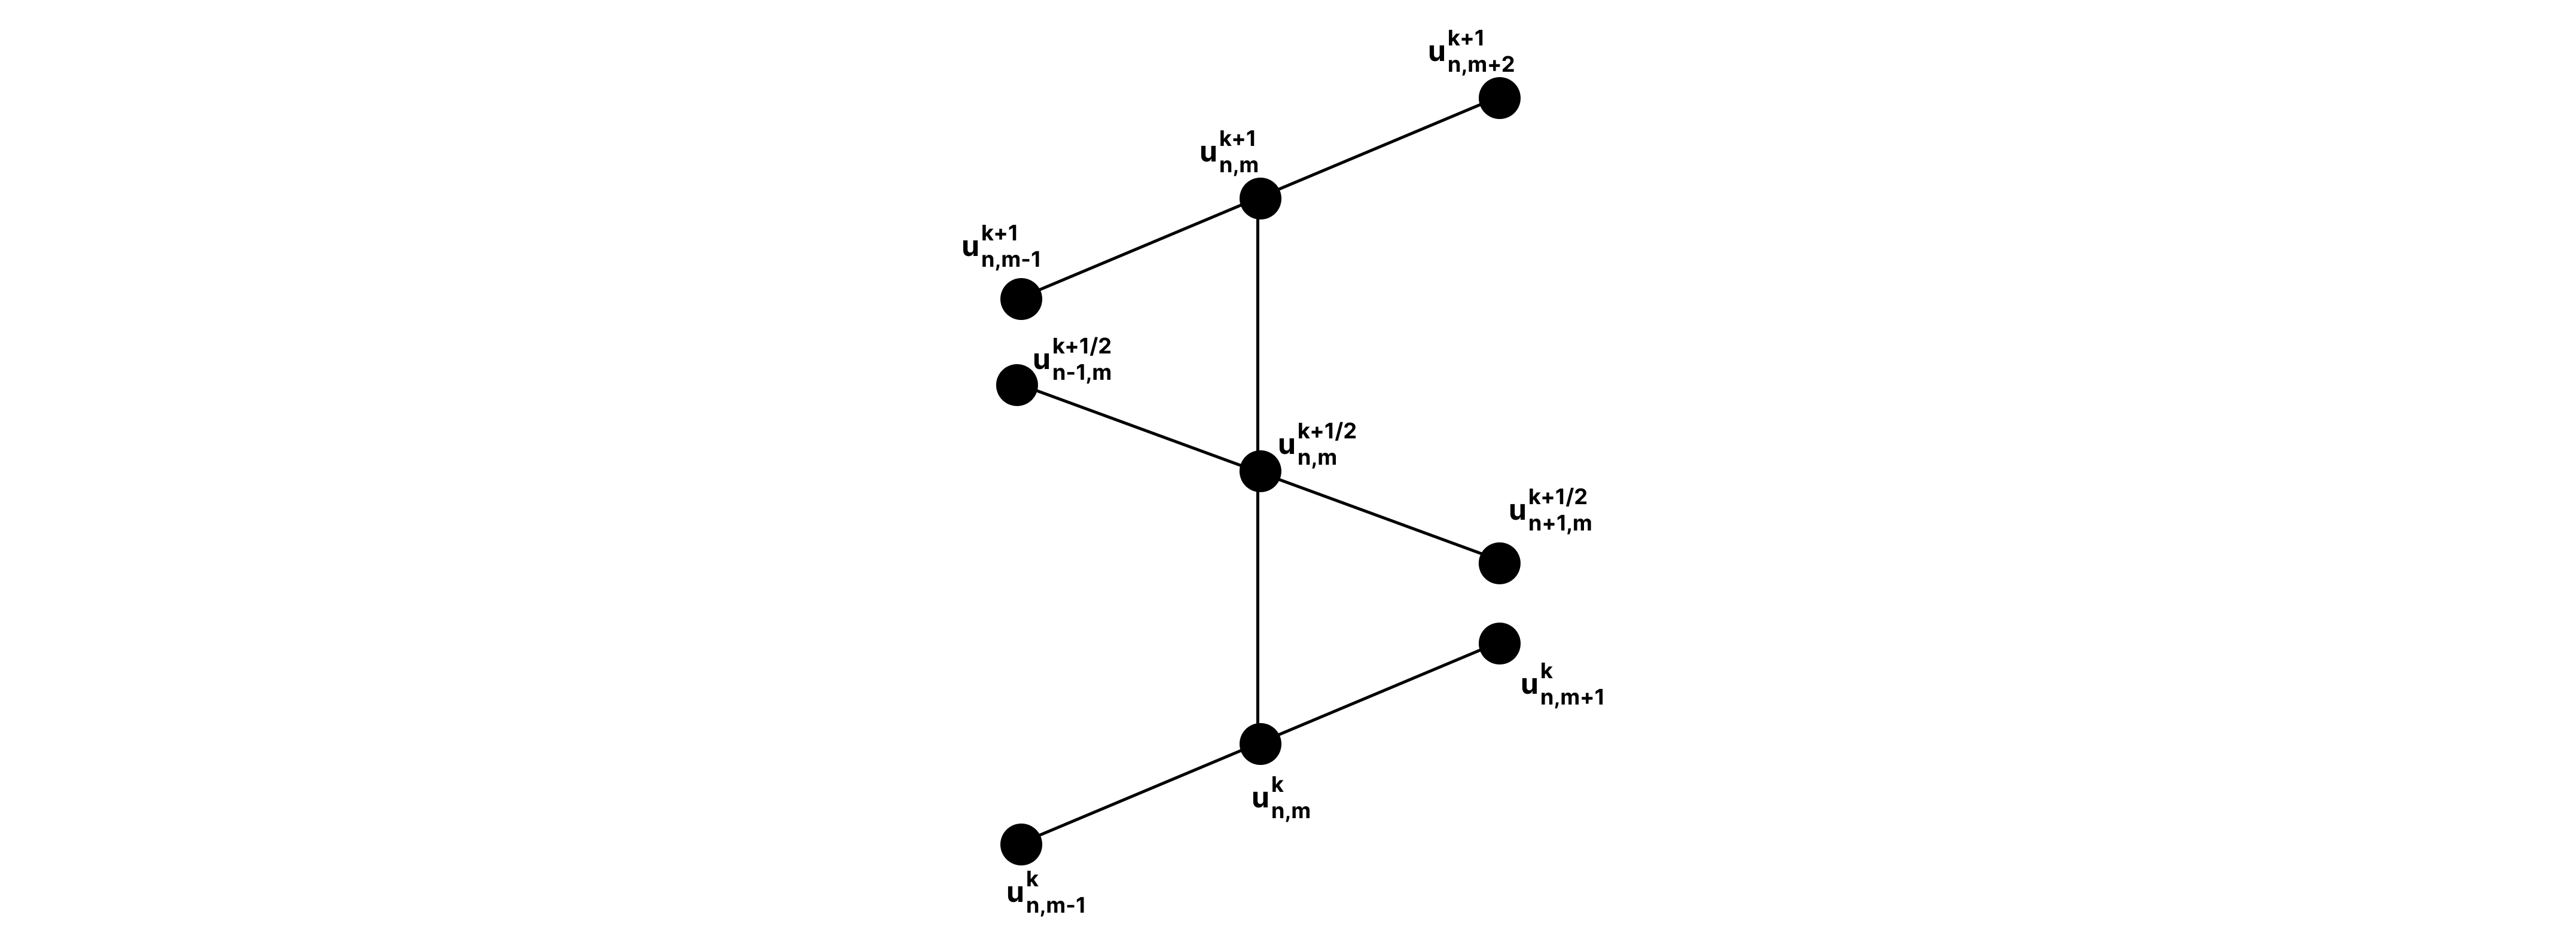

### _Метод прогонки_
Рассмотрим задачу \eqref{eq41}. Раскроем оператор Лапласа и умножим на $\tau/2$ с обеих сторон:

$$
\begin{equation}\label{eq43}
     u^{k+1/2}_{n,m} - u^{k}_{n,m} = \frac{\tau}{2}\frac{u^{k+1/2}_{n+1,m} -2 u^{k+1/2}_{n,m} + u^{k+1/2}_{n-1,m}}{h_{x}^2} + \frac{\tau}{2}\frac{u^{k}_{n,m+1} -2 u^{k}_{n,m} + u^{k}_{n,m-1}}{h_{y}^2}
\end{equation}
$$

Обозначим неизвестные - $u^{k+1/2}_{n+1,m}, u^{k+1/2}_{n,m}, u^{k+1/2}_{n-1,m}$ - соответственно $y_{n+1}, y_{n}, y_{n-1}$. Перепишем уравнение \eqref{eq43} в виде:

$$
\begin{equation}\label{eq44}
     A_n y_{n-1} + B_n y_{n} + C_n y_{n+1} = F_n,
\end{equation}
$$

где 
$$
    \begin{gather}
    A_n = \frac{\tau}{2h_x^2} \label{eq45} \\
	B_n = -1-\frac{\tau}{h_x^2} \label{eq46} \\
	C_n = \frac{\tau}{2h_x^2} \label{eq47} \\
	F_n = - \frac{\tau}{2}\frac{u^{k}_{n,m+1} -2 u^{k}_{n,m} + u^{k}_{n,m-1}}{h_{y}^2} - u^{k}_{n,m} \label{eq48}
    \end{gather}
$$

Каждое предыдущее значение $y_n$ можно выразить через последующее (формула обратной прогонки):

$$
\begin{equation}\label{eq49}
     y_{n} = \alpha_{n+1}y_{n+1}+\beta_{n+1}
\end{equation}
$$

Подставим выражение для $y_{n-1}$ в \eqref{eq44}:

$$
    \begin{gather}
    A_n (\alpha_{n}y_{n}+\beta_{n}) + B_n y_{n} + C_n y_{n+1} = F_n \label{eq50} \\
	y_{n} = -\frac{C_n}{\alpha_{n} A_n + B_n} y_{n+1}+\frac{F_n-A_n \beta_{n}}{\alpha_{n} A_n + B_n} \label{eq51} 
    \end{gather}
$$

Сравнивая выражения \eqref{eq49} и \eqref{eq51}, получаем:

$$
    \begin{gather}
    \alpha_{n+1} =  -\frac{C_n}{\alpha_{n} A_n + B_n} \label{eq52} \\
	\beta_{n+1} = \frac{F_n-A_n \beta_{n}}{\alpha_{n} A_n + B_n} \label{eq53} 
    \end{gather}
$$

Мы получили формулы прямой прогонки.
Из граничных условий мы получаем, что:

$$
    \begin{gather}
    \frac{y_1 - y_0}{h_x} =  0 \label{eq54} \\
	y_0 = \alpha_{1} y_1 + \beta_{1} = y_1 \ \Rightarrow \ \alpha_{1} = 1, \beta_{1} = 0 \label{eq55} \\
	\frac{y_{N_x} - y_{N_x-1}}{h_x} =  0 \label{eq56} \\
	y_{N_x-1} = \alpha_{N_x} y_{N_x} + \beta_{N_x} = y_{N_x} \ \Rightarrow \ y_{N_x} = \frac{\beta_{N_x}}{1 - \alpha_{N_x}} \label{eq57}
    \end{gather}
$$

Аналогично мы решаем неявную задачу по $y$. Поскольку граничные условия в нашей задаче совпадают, разницы не будет. 

### _Порядок аппроксимации_

Разложим разностный оператор &\Lambda_x& в ряд Тейлора

$$
\frac{u^{k}_{n+1,m}-2u^{k}_{n,m}+u^{k}_{n-1,m}}{h^{2}_{x}} = \frac{1}{h^2_x}\left(h_x^2u^{k(2)}_{n,m} + \frac{h_x^4}{12}u^{k(4)}_{n,m}\right) \sim O\left(h^2_x\right)
$$


$$
\frac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h^{2}_{y}} = \frac{1}{h^2_y}\left(h_y^2u^{k(2)}_{n,m} + \frac{h_y^4}{12}u^{k(4)}_{n,m}\right) \sim O\left(h^2_y\right)
$$

То есть порядок аппроксимации по пространственным координатам компонентам равен $O\left(|h|^2\right)$. 

Чтобы найти порядок аппроксимации по временной компоненте разложим в ряд Тейлора до соответствующих порядков производные по вермени

$$
\begin{equation}
	\begin{cases}
		u^{k+1} = u^{k+1/2} + \frac{\tau}{2}u_t^{k+1/2}+\frac{1}{2}\frac{\tau^2}{4}u^{k+1/2}_{tt}+\frac{1}{2}\frac{\tau^3}{8}u^{k+1/2}_{ttt} + O\left(\tau^4\right)\\
		u^{k} = u^{k+1/2} - \frac{\tau}{2}u_t^{k+1/2}+\frac{1}{2}\frac{\tau^2}{4}u^{k+1/2}_{tt}-\frac{1}{2}\frac{\tau^3}{8}u^{k+1/2}_{ttt} + O\left(\tau^4\right)
	\end{cases}
\end{equation}
$$

Тогда в точке $t^{k+1/2}$ аппроксимация производной по времени будет выглядеть

$$
\frac{u^{k+1}-u^{k}}{\tau} = \frac{1}{\tau}\left(\tau u^{k+1/2}_t + \frac{1}{3}\frac{\tau^3}{8}u^{k+1/2}_{ttt} + O(\tau^4)\right) = u^{k+1/2}_t+O(\tau^2)
$$

Невязка равна $O\left(|h|^2+\tau^2\right)$.

### _Устойчивость_

Устойчивость схемы по начальным данным будем исследовать с помощью спеутрального метода Ньютона. Ищем решение в виде $u^k_{n,m} = \lambda_1^ke^{i(\alpha n+\beta m)}$. Подставим решение в разностное уравнение и получим

$$
\sqrt{\lambda^k_1} = \frac{1-\frac{2\tau}{h_y^2}\sin^2\frac{\beta}{2}}{1 + \frac{2\tau}{h_x^2}\sin^2\frac{\alpha}{2}} < 1,\ \ \forall \tau, h_x, h_y, \alpha, \beta.
$$

Аналогично $u^k_{n,m} = \lambda_2^ke^{i(\alpha n+\beta m)}$.

$$
\sqrt{\lambda^k_2} = \frac{1-\frac{2\tau}{h_x^2}\sin^2\frac{\alpha}{2}}{1 + \frac{2\tau}{h_y^2}\sin^2\frac{\beta}{2}} < 1,\ \ \forall \tau, h_x, h_y, \alpha, \beta.
$$

Значит для каждого из уравнений выполняется критерий Неймана. Из $\lambda_1\lambda_2 < 1,\ \ \forall \tau, h_x, h_y, \alpha, \beta$ следует, что он выполняется и переходе с $j$-ого слоя на $j+1$-ый. Значит схема переменных направлений безусловно устойчива.

### _Програмная реализация численного решения_
#### _Необходимые функции для метода прогонки_

In [87]:
def getA1(u, i2, j):
    A = np.zeros((u.shape[1], u.shape[1]))

    A[0, 0], A[0, 1] = 1, -1
    A[-1, -1], A[-1, -2] = 1, -1
    for i in range(1, A.shape[0]-1):
        A[i, i-1] = 1/h_x**2
        A[i, i] = -2/h_t-2/h_x**2
        A[i, i+1] = 1/h_x**2
      
    return A

def getF1(u, i2, j):
    y = i2*h_y+h_y
    t = j*h_t

    F = np.zeros((u.shape[1]))
    F[0] = 0
    F[-1] = 0
    for i in range(1, F.shape[0]-1):
        x = i*h_x+h_x
        F[i] = -2/h_t*u[i2, i]-1/h_y**2*(u[i2+1, i]-2*u[i2, i]+u[i2-1, i])
    F = F.reshape((F.shape[0], 1))

    return F


def border1(u, x):
    u[0, :] = u[1, :]
    u[-1, :] = u[-2, :]
    return u

In [88]:

def getA2(u, i1, j):
    A = np.zeros((u.shape[0], u.shape[0]))

    A[0, 0], A[0, 1] = 1, -1
    A[-1, -1], A[-1, -2] = 1, -1
    for i in range(1, A.shape[0]-1):
        A[i, i-1] = 1/h_x**2
        A[i, i] = -2/h_t-2/h_x**2
        A[i, i+1] = 1/h_x**2
    
    return A

def getF2(u, i1, j):
    x = i1*h_x+h_x
    t = j*h_t

    F = np.zeros((u.shape[0]))
    F[0] = 0
    F[-1] = 0
    for i in range(1, F.shape[0]-1):
        y = i*h_y+h_y
        F[i] = -2/h_t*u[i, i1]-1/h_y**2*(u[i, i1+1]-2*u[i, i1]+u[i, i1-1])
    F = F.reshape((F.shape[0], 1))

    return F
  
def border2(u, y):
    u[:, 0] = u[:, 1]
    u[:, -1] = u[:, -2]
    return u

In [89]:

def solver_progonka(A, F):
    a = np.zeros((A.shape[0]))
    b = np.zeros_like(a)
    for i in range(A.shape[0]-1):
        if i == 0:
            a[i] = -A[i, i+1]/A[i, i]
        else:
            a[i] = A[i, i+1]/(-A[i, i]-a[i-1]*A[i, i-1])
    for i in range(A.shape[0]):
        if i == 0:
            b[i] = F[i, 0]/A[i, i]
        else:
            b[i] = (-F[i, 0]+A[i, i-1]*b[i-1])/(-A[i, i]-a[i-1]*A[i, i-1])

    y = np.zeros_like(a)
    for i in range(A.shape[0]-1, -1, -1):
        if i == A.shape[0]-1:
            y[i] = b[i]
        else:
            y[i] = a[i]*y[i+1]+b[i]
    
    return y

def calculate(w):
    for i in tqdm(range(J)):
        time.sleep(1)
        for j in range(0, J-1):
            # Сперва находим на j+1/2 слое.
            u = np.zeros((w.shape[1], w.shape[2]))+np.nan  # np.nan, чтобы поймать ошибки.
            for i2 in range(1, M-1):
                u[i2] = solver_progonka(getA1(w[j], i2, j), getF1(w[j], i2, j))
            u = border1(u, x)

            # Теперь находим на j+1 слое.
            for i1 in range(1, N-1):
                w[j+1, :, i1] = solver_progonka(getA2(u, i1, j), getF2(u, i1, j))
            w[j+1] = border2(w[j+1], y)
    return w

#### _Инициализация нашей задачи_

In [90]:
# Превратим все в nan, чтобы быстро найти ошибки.
# Если мы обратимся к узлу, где еще не посчитали значение, там будет nan,
# а все, что угодно, + nan равно nan.    
h_x = (x_end-x_start)/(N-1)
h_y = (y_end-y_start)/(M-1)
h_t = (t_end-t_start)/J

x = np.linspace(x_start-h_x/2, x_end+h_x/2, N)
y = np.linspace(y_start-h_y/2, y_end+h_y/2, M)
t = np.linspace(t_start, t_end, J)

w = np.zeros((N, M, J))+np.nan

X, Y = np.meshgrid(x, y)
w[0] = np.cos(4*X)*np.cos(2*Y)

w =  calculate(w)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.02s/it]


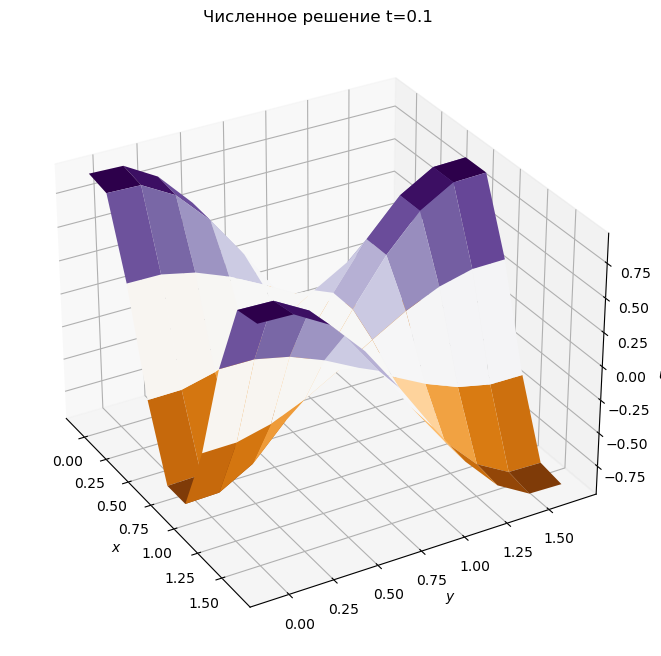

In [98]:
tt=0.1
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, w[int(t/(2*h_t))])
ax.plot_surface(X, Y, w[int(tt/J)], rstride = 1, cstride = 1, cmap = cm.PuOr)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
# ax.set_zlim(-4, 4)
ax.set_title("Численное решение t={}".format(tt))
ax.view_init(30, -30)
plt.show()

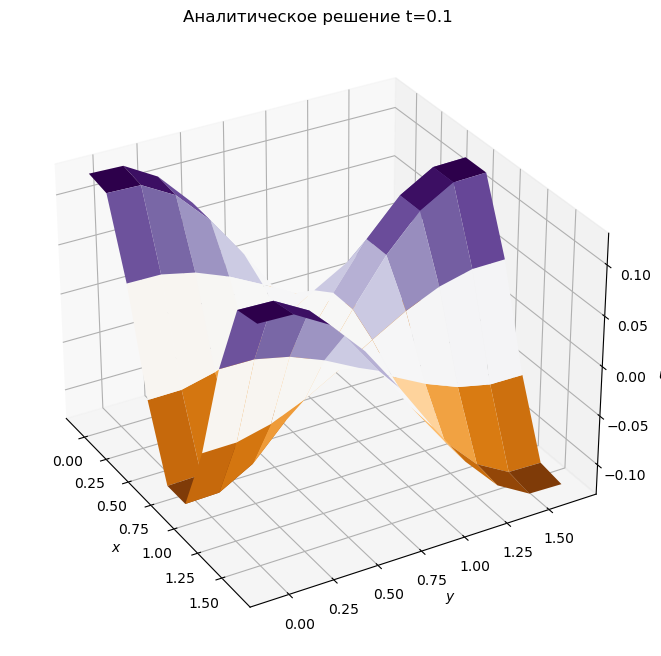

In [99]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, w[int(t/(2*h_t))])
ax.plot_surface(X, Y, np.exp(-20*tt)*np.cos(4*X)*np.cos(2*Y), rstride = 1, cstride = 1, cmap = cm.PuOr)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
ax.set_title("Аналитическое решение t={}".format(tt))
ax.view_init(30, -30)
plt.show()

#### _Проверка выполнения граничных условий_

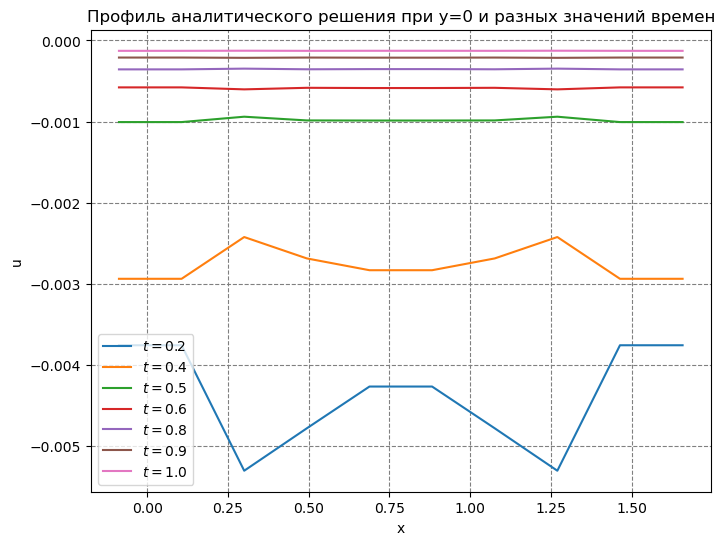

In [100]:
fig,ax=plt.subplots(figsize=(8,6))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического решения при y=0 и разных значений времен')

# plt.plot(x, u_a[:,0,int(0)],label='$t=$' + str(round(0,1)) + ' τ')
# plt.plot(x, w[int(J/8), 0, :],label='$t=$' + str(round(h_t*J/8,1)))
plt.plot(x, w[int(2*J/8), 0, :],label='$t= $' +str(round(h_t*2*J/8,1)))
plt.plot(x, w[int(3*J/8), 0, :],label='$t= $' +str(round(h_t*3*J/8,1)))
plt.plot(x, w[int(4*J/8), 0, :],label='$t= $' +str(round(h_t*4*J/8,1)))
plt.plot(x, w[int(5*J/8), 0, :],label='$t= $' +str(round(h_t*5*J/8,1)))
plt.plot(x, w[int(6*J/8), 0, :],label='$t= $' +str(round(h_t*6*J/8,1)))
plt.plot(x, w[int(7*J/8), 0, :],label='$t= $' +str(round(h_t*7*J/8,1)))
plt.plot(x, w[J-1, 0, :],label='$t= $' +str(round(h_t*8*J/8,1)))
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

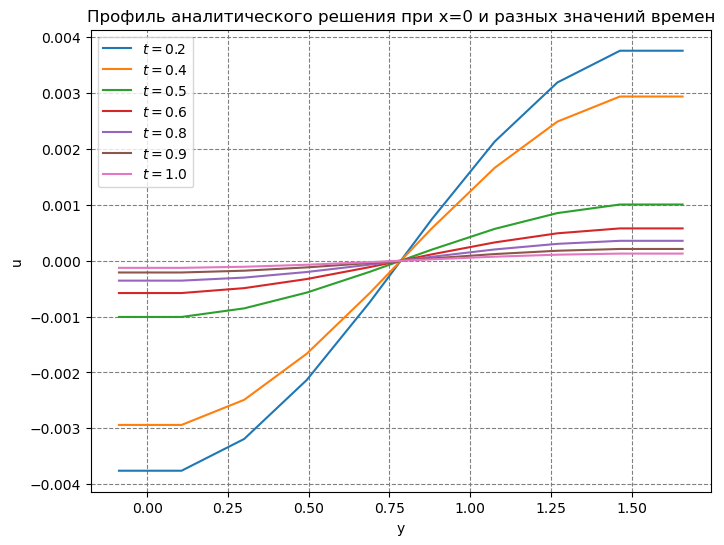

In [101]:
fig,ax=plt.subplots(figsize=(8,6))
plt.xlabel('y')
plt.ylabel('u')
plt.title('Профиль аналитического решения при x=0 и разных значений времен')

# plt.plot(x, u_a[:,0,int(0)],label='$t=$' + str(round(0,1)) + ' τ')
# plt.plot(x, w[int(J/8), :, 0],label='$t=$' + str(round(h_t*J/8,1)))
plt.plot(x, w[int(2*J/8), :, 0],label='$t= $' +str(round(h_t*2*J/8,1)))
plt.plot(x, w[int(3*J/8), :, 0],label='$t= $' +str(round(h_t*3*J/8,1)))
plt.plot(x, w[int(4*J/8), :, 0],label='$t= $' +str(round(h_t*4*J/8,1)))
plt.plot(x, w[int(5*J/8), :, 0],label='$t= $' +str(round(h_t*5*J/8,1)))
plt.plot(x, w[int(6*J/8), :, 0],label='$t= $' +str(round(h_t*6*J/8,1)))
plt.plot(x, w[int(7*J/8), :, 0],label='$t= $' +str(round(h_t*7*J/8,1)))
plt.plot(x, w[J-1, :, 0],label='$t= $' +str(round(h_t*8*J/8,1)))
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')

Как видно, у численного решения выполняются граничные условия, а также, как и у аналитического, наблюдается тенденция уменьшения с течением времени.

###  _Погрешность_

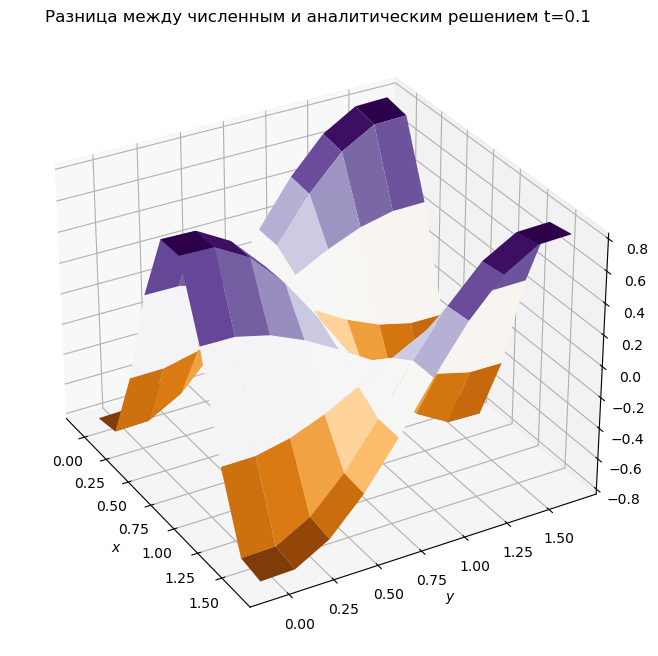

In [102]:
u_anal = np.exp(-20*tt)*np.cos(4*X)*np.cos(2*Y)
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, w[int(t/(2*h_t))])
ax.plot_surface(X, Y, u_anal-w[int(tt/J)], rstride = 1, cstride = 1, cmap = cm.PuOr)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u$")
ax.set_title("Разница между численным и аналитическим решением t={}".format(tt))
ax.view_init(30, -30)


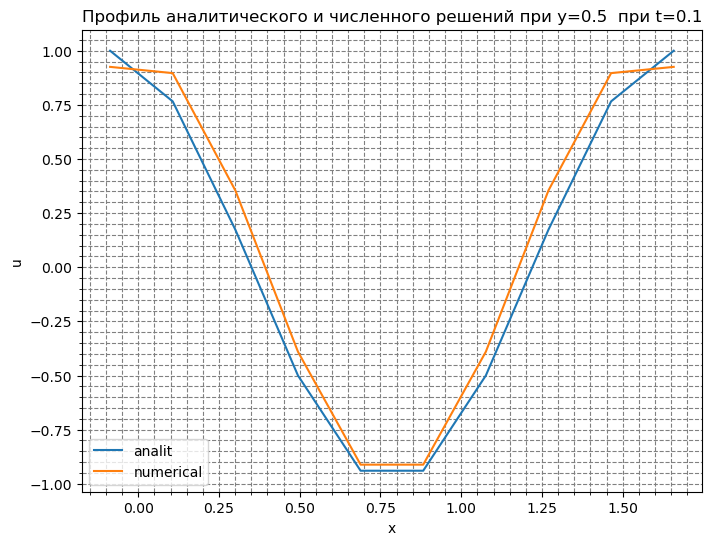

In [104]:
tt=0.1
yy=0.5
fig,ax=plt.subplots(figsize=(8,6))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль аналитического и численного решений при y=' + str(yy) + '  при t=' + str(tt))

# plt.plot(x, u_anal-w[int(tt/J), :, 0])
plt.plot(x, u_a[int(yy/M), :, int(tt/J)], label="analit")
plt.plot(x, w[int(tt/J), int(yy/M), :], label="numerical")
ax.minorticks_on()
ax.grid(which='both', color = 'gray',ls='--')
ax.legend(loc='best')

### _Сгущение сетки_

N = M = J = 10

N = M = J = 20

N = M = J = 50

N = M = J = 100